In [1]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
themes = get_themes()
themes
set_nb_theme(themes[1])

# Part 1: Data Preprocessing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [3]:
# Loading the dataset

dataset = pd.read_csv("Churn_Modelling.csv")
print(dataset)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [4]:
# Dividing the dataset for comarision

x = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values
print(x)
print(y)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


In [5]:
# Encoding the categorical data

# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le_x_1 = LabelEncoder()
x[:, 1] = le_x_1.fit_transform(x[:, 1])
le_x_2 = LabelEncoder()
x[:, 2] = le_x_2.fit_transform(x[:, 2])
ohe = ColumnTransformer(
    transformers=[
        ("OneHot",        # Just a name
         OneHotEncoder(), # The transformer class
         [1]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough'
)
x = ohe.fit_transform(x.tolist())
x = x.astype('float64')

In [6]:
# Creating training and testing datasets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3)
print(x_train)
print(y_train)
print(x_test)
print(y_test)

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.0348069e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.1027517e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.5162371e+05]
 ...
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.2601358e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.1763263e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.9427091e+05]]
[0 0 0 ... 1 0 0]
[[0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 3.3330890e+04]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 2.3598230e+04]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.4029824e+05]
 ...
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 8.3263060e+04]
 [0.0000000e+00 1.0000000e+00 0.0000000e+

In [7]:
# Feature Scaling

sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
print(x_train)
print(x_test)

[[ 0.98422285 -0.57931346 -0.56314386 ...  0.64792616 -1.0236827
   0.06212022]
 [-1.01603006 -0.57931346  1.7757452  ...  0.64792616  0.9768652
   0.1802526 ]
 [ 0.98422285 -0.57931346 -0.56314386 ...  0.64792616  0.9768652
   0.89915993]
 ...
 [ 0.98422285 -0.57931346 -0.56314386 ...  0.64792616 -1.0236827
   0.45388882]
 [-1.01603006  1.72618119 -0.56314386 ...  0.64792616  0.9768652
   0.30817324]
 [ 0.98422285 -0.57931346 -0.56314386 ...  0.64792616  0.9768652
   1.64064644]]
[[-1.01603006  1.72618119 -0.56314386 ... -1.54338575  0.9768652
  -1.15754087]
 [ 0.98422285 -0.57931346 -0.56314386 ...  0.64792616  0.9768652
  -1.32675799]
 [-1.01603006  1.72618119 -0.56314386 ...  0.64792616 -1.0236827
   0.70224939]
 ...
 [ 0.98422285 -0.57931346 -0.56314386 ...  0.64792616 -1.0236827
  -0.28939407]
 [-1.01603006  1.72618119 -0.56314386 ...  0.64792616  0.9768652
  -0.72508972]
 [-1.01603006  1.72618119 -0.56314386 ... -1.54338575 -1.0236827
  -0.91448859]]


# Part 2: Making of ANN

In [8]:
# Importing the libraries

import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow

In [9]:
# Initialising the ANN

classifier = Sequential()

# Adding the input layer and hidden layer

classifier.add(Dense(6, kernel_initializer='uniform', activation='relu', input_dim=12))

# Adding second hidden layer

classifier.add(Dense(6, kernel_initializer='uniform', activation='relu'))

# Adding the output layer

classifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [10]:
# Compiling the ANN

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Fitting the ANN to the training set

classifier.fit(x_train, y_train, batch_size=12, epochs=100)

Epoch 1/100
556/556 [==============================] - 1s 976us/step - loss: 0.5220 - accuracy: 0.7871
Epoch 2/100
556/556 [==============================] - 1s 962us/step - loss: 0.4381 - accuracy: 0.7882
Epoch 3/100
556/556 [==============================] - 0s 866us/step - loss: 0.4347 - accuracy: 0.7882
Epoch 4/100
556/556 [==============================] - 1s 937us/step - loss: 0.4317 - accuracy: 0.7882
Epoch 5/100
556/556 [==============================] - 1s 981us/step - loss: 0.4282 - accuracy: 0.8099
Epoch 6/100
556/556 [==============================] - 1s 955us/step - loss: 0.4248 - accuracy: 0.8137
Epoch 7/100
556/556 [==============================] - 0s 831us/step - loss: 0.4216 - accuracy: 0.8141
Epoch 8/100
556/556 [==============================] - 1s 987us/step - loss: 0.4169 - accuracy: 0.8207
Epoch 9/100
556/556 [==============================] - 1s 961us/step - loss: 0.4085 - accuracy: 0.8281
Epoch 10/100
556/556 [==============================] - 1s 975us/step - l

556/556 [==============================] - 0s 701us/step - loss: 0.3490 - accuracy: 0.8591
Epoch 81/100
556/556 [==============================] - 0s 729us/step - loss: 0.3487 - accuracy: 0.8579
Epoch 82/100
556/556 [==============================] - 0s 813us/step - loss: 0.3496 - accuracy: 0.8573
Epoch 83/100
556/556 [==============================] - 0s 611us/step - loss: 0.3488 - accuracy: 0.8582
Epoch 84/100
556/556 [==============================] - 0s 674us/step - loss: 0.3485 - accuracy: 0.8576
Epoch 85/100
556/556 [==============================] - 0s 607us/step - loss: 0.3488 - accuracy: 0.8564
Epoch 86/100
556/556 [==============================] - 0s 593us/step - loss: 0.3489 - accuracy: 0.8587
Epoch 87/100
556/556 [==============================] - 0s 679us/step - loss: 0.3487 - accuracy: 0.8566
Epoch 88/100
556/556 [==============================] - 0s 684us/step - loss: 0.3489 - accuracy: 0.8572
Epoch 89/100
556/556 [==============================] - 0s 675us/step - loss:

# Part 3: Making the prediction and evaluating the model

In [12]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.6)

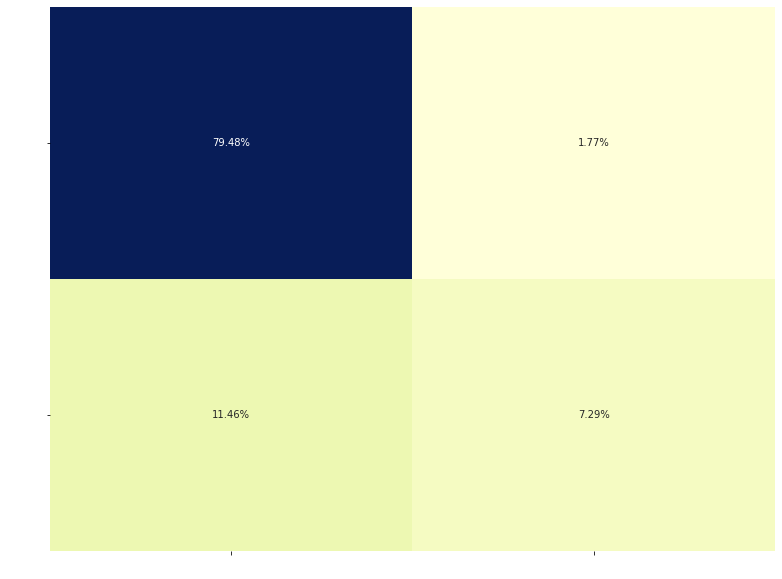

In [13]:
# Confusion Matrix

import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(13,10))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap="YlGnBu", cbar=False)
ax.set_xticklabels(['True', 'False'], rotation=0, size=14)
ax.set_yticklabels(['True', 'False'], rotation=0, size=14)
for tick in ax.get_xticklabels():
    tick.set_color('white')
for tick in ax.get_yticklabels():
    tick.set_color('white')